In [1]:
import pickle
import glob

import matplotlib.pyplot as plt
import numpy as np

from metrics import Loader, get_hist, JS

In [2]:
mps_example = '/home/nevena/data_tsanfleuron/mps/simu_mps_param_8_12-02-2021/simulation_grad_real_17.pickle'
sgs_example = '/home/nevena/data_tsanfleuron/sgs/sgs_test_24_pts_border_05-05-21/real_sgs_17.pickle'
krig_example = '/home/nevena/data_tsanfleuron/krig/real_krig_17.pickle'

## Plot maps (demonstration of Loader class)

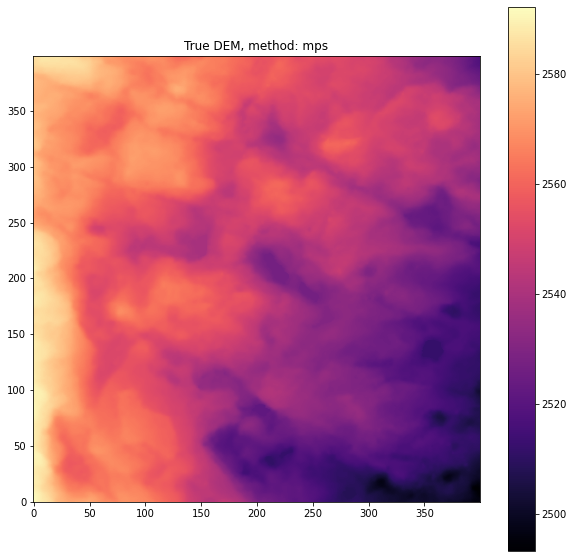

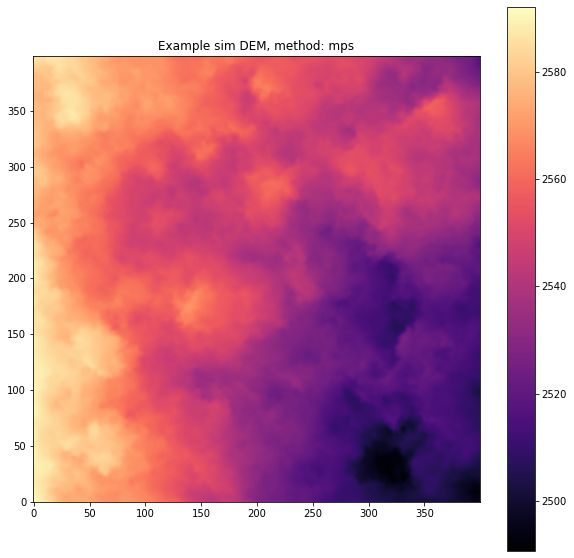

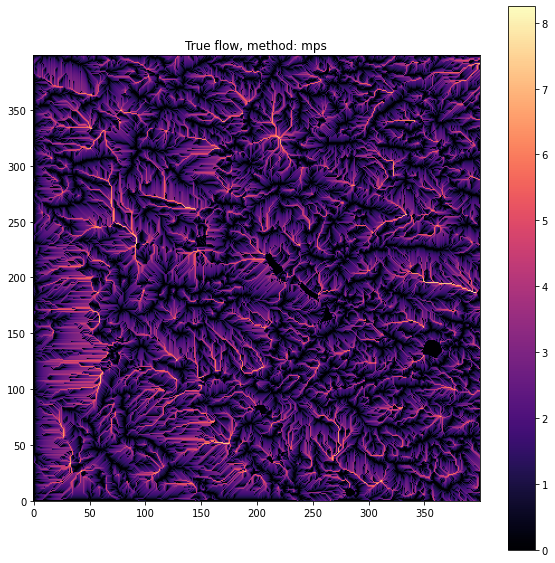

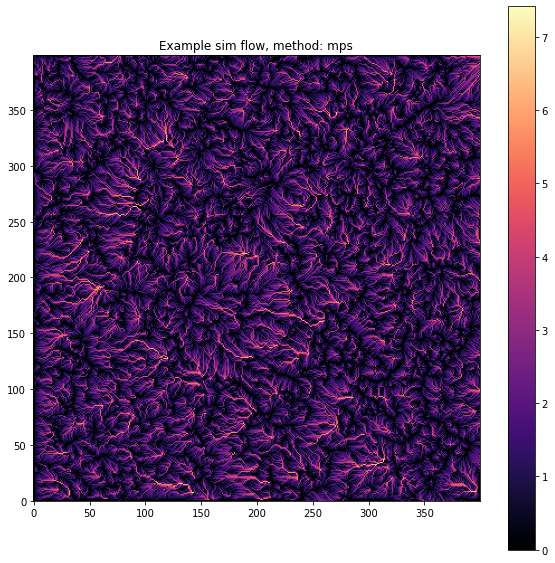

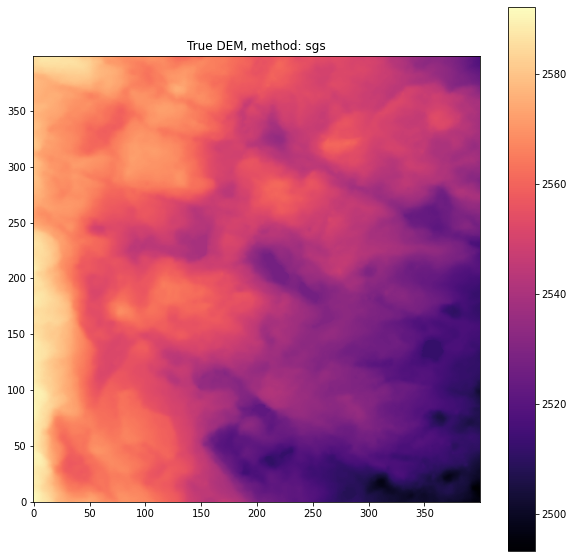

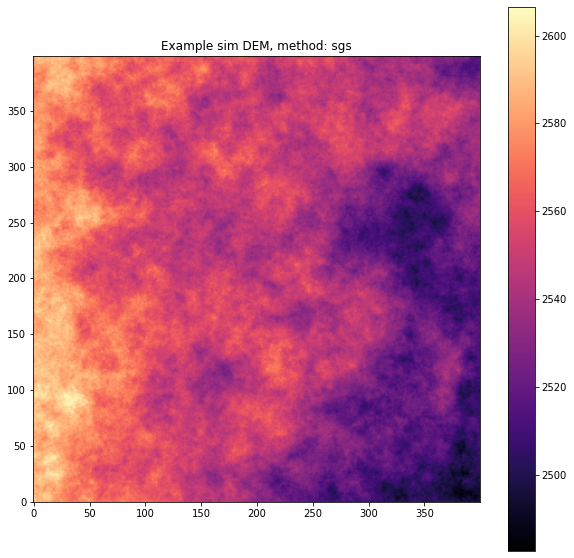

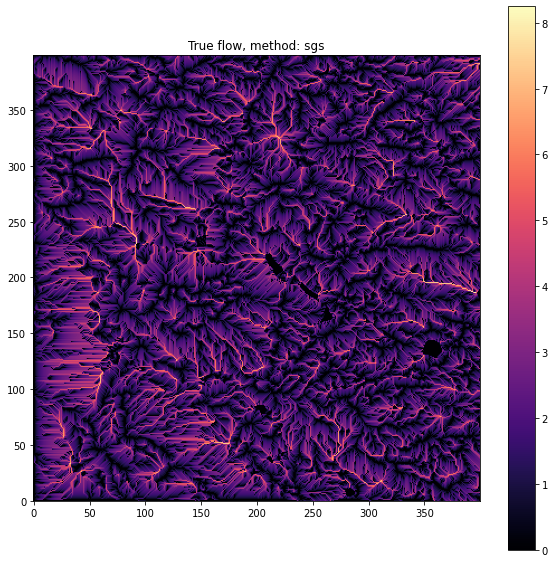

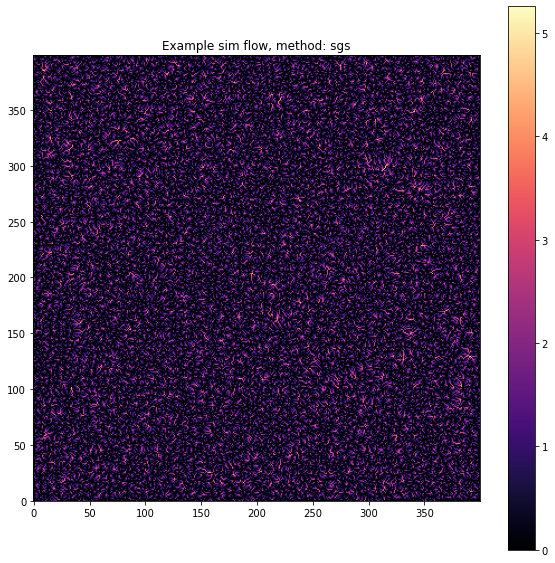

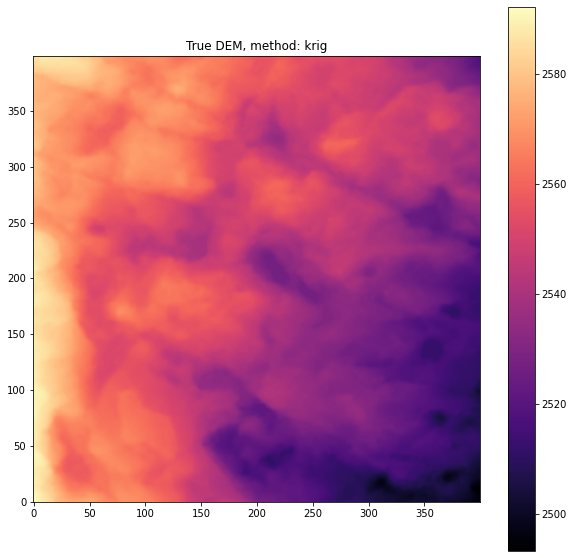

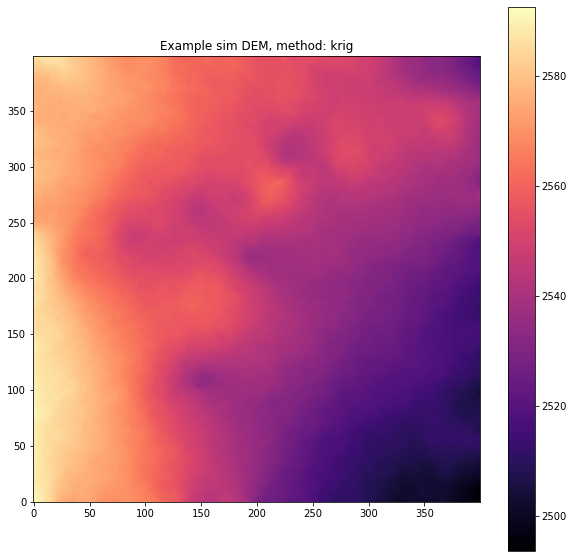

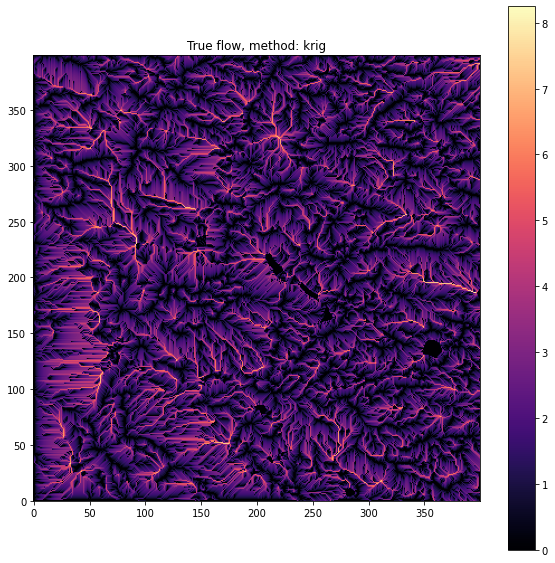

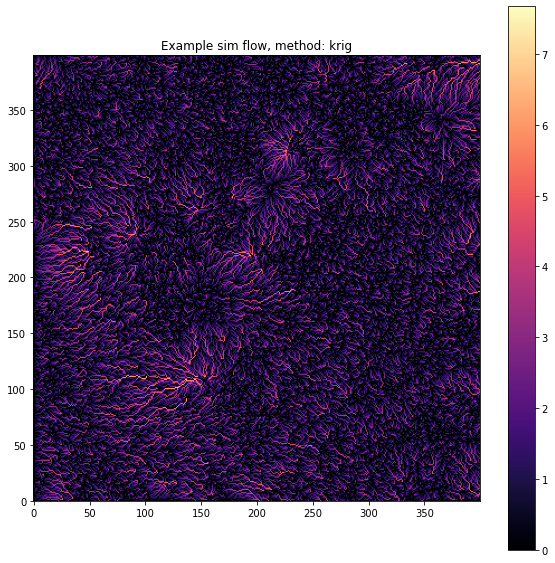

In [3]:
for example in [mps_example, sgs_example, krig_example]:
    loader = Loader(example)
    
    true = loader.get_true_dem()
    plt.figure(figsize=(10,10))
    plt.title(f'True DEM, method: {loader.method}')
    plt.imshow(loader.get_true_dem(), origin='lower', cmap='magma')
    plt.colorbar()
    
    plt.figure(figsize=(10,10))
    plt.title(f'Example sim DEM, method: {loader.method}')
    plt.imshow(loader.get_simulated_dems()[:,:,0], origin='lower', cmap='magma')
    #print(loader.get_simulated_dems()[:,:,0][70:80, 270:280])
    plt.colorbar()
    
    plt.figure(figsize=(10,10))
    plt.title(f'True flow, method: {loader.method}')
    plt.imshow(np.log(loader.get_true_flow()), origin='lower', cmap='magma')
    plt.colorbar()
    
    plt.figure(figsize=(10,10))
    plt.title(f'Example sim flow, method: {loader.method}')
    plt.imshow(np.log(loader.get_simulated_flows())[:,:,0], origin='lower', cmap='magma')
    plt.colorbar()

## Demonstration of "histograms"

In [4]:
color_mps = 'royalblue'
color_sgs = 'tan'
color_dem = 'red'
color_krig = 'green'

findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.


0.014900523988955028
0.0554932819802596
0.10859567377567592


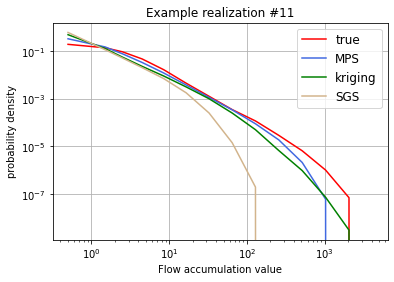

In [5]:
import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "helvetica"
matplotlib.rcParams['axes.titlesize'] = 12
matplotlib.rcParams['axes.titlesize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['legend.fontsize'] = 10
matplotlib.rcParams['savefig.pad_inches'] = 0.1
matplotlib.rcParams['savefig.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['savefig.bbox'] = 'tight'


# the same topography ("realisation")
# each simulation method
# one example simulation: in the next notebook a simple average
# over ensemble of simulations is computed
histograms = []
for example in [mps_example, krig_example, sgs_example]:
    loader = Loader(example)
    simulated_flows = loader.get_simulated_flows()
    true_flow = loader.get_true_flow()
    hist_true, bins = get_hist(true_flow)
    hist, _ = get_hist(simulated_flows[:,:,0].reshape(-1))
    histograms.append(hist)
    
fig, ax = plt.subplots()
ax.set_title(f'Example realization #11', fontsize=12) # {loader.method}, JS: {(JS(bins, hist_true, hist))}')
ax.grid()
ax.loglog(bins[:-1], hist_true, color=color_dem)
for hist, color in zip(histograms, [color_mps, color_krig, color_sgs]):
    ax.loglog(bins[:-1], hist, color=color)
    print(JS(bins, hist_true, hist))
ax.legend(['true', 'MPS', 'kriging', 'SGS'], fontsize=12)
ax.set_xlabel('Flow accumulation value', fontsize=10)
ax.set_ylabel('probability density', fontsize=10)
fig.savefig('flow-histogram.pdf', dpi=300, pad_inches=0.1, facecolor='white', bbox_inches='tight')

In [6]:
# get all filenames (pickles)
import pandas as pd
files = glob.glob('/home/nevena/data_tsanfleuron/**/*.pickle', recursive=True)
df = pd.DataFrame({'filename': files})

In [7]:
import geone
def plot_true_and_simulation(row, i=0):
    loader = Loader(row['filename'])
    img_geone = loader.get_Img_true_dem()
    hd = loader.get_conditioning_points()
    vmin = np.min(img_geone.val)
    vmax = np.max(img_geone.val)
    plt.figure()
    geone.imgplot.drawImage2D(img_geone, cmap='magma', vmin=vmin, vmax=vmax, title=f'true DEM realisation {row["realization"]}')
    plt.scatter(hd['cell_x'], hd['cell_y'], marker='.', s=1,
                edgecolors='white', linewidths=1) # add hard data points

In [8]:
import re
def parse_filenames(row):
    name = row['filename']
    row['grad'] = 'grad' in name
    row['hill'] = 'hill' in name
    row['realization'] = int(re.search(r"real[^0-9]*(\d+).pickle", name).group(1))
    sgs_p = re.search(r"sgs_(\d+)", name)
    row['sgs_points'] = 0 if sgs_p is None else int(sgs_p.group(1))
    mps_p = re.search(r"mps_param_(\d+)", name)
    row['mps_param_set'] = 0 if mps_p is None else int(mps_p.group(1))
    return row

In [9]:
df = df.apply(lambda row: parse_filenames(row), axis=1)

In [10]:
df_realisations = df.drop_duplicates(subset=['realization']).sort_values(by='realization')

/tmp/ipykernel_15407/3633140061.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


5     None
0     None
4     None
15    None
1     None
7     None
19    None
6     None
9     None
22    None
2     None
3     None
8     None
25    None
29    None
11    None
21    None
13    None
14    None
35    None
32    None
28    None
10    None
27    None
dtype: object

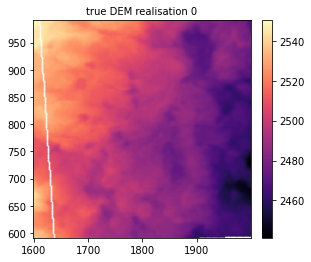

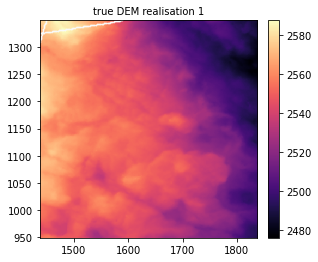

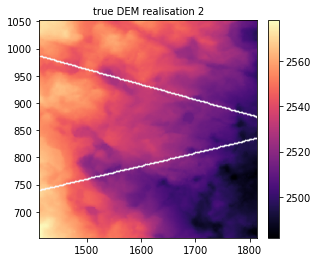

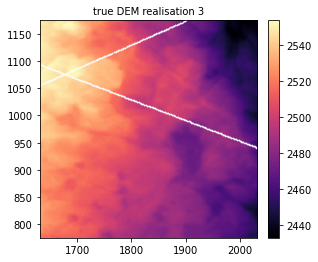

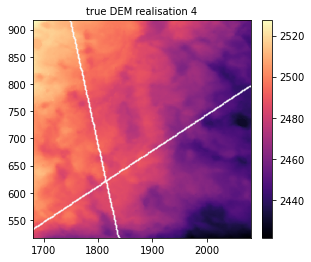

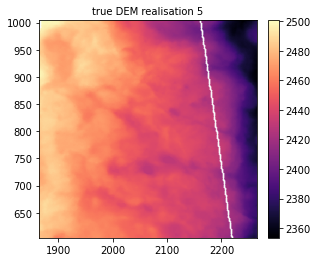

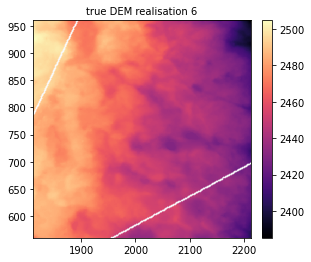

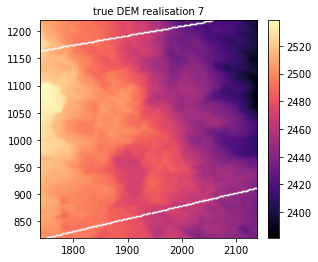

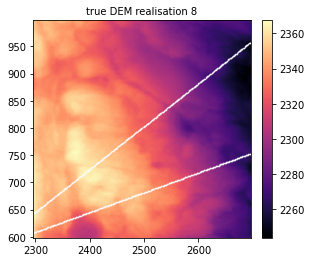

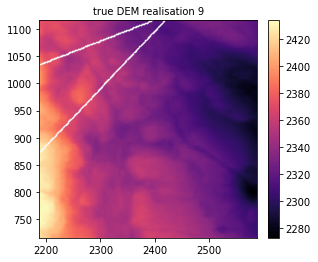

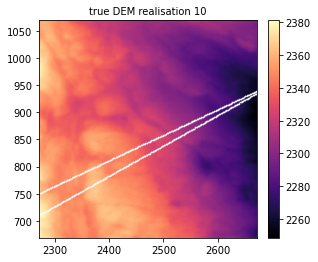

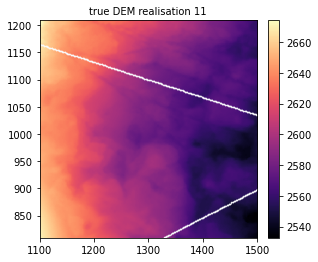

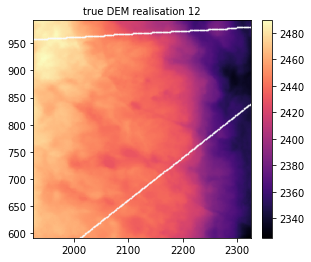

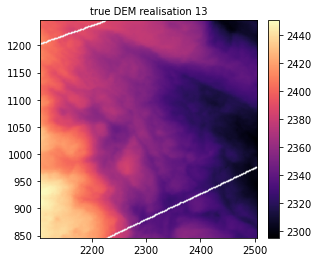

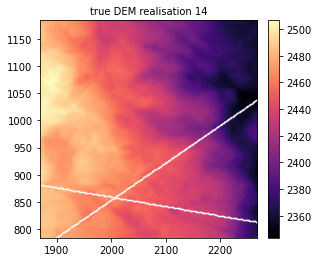

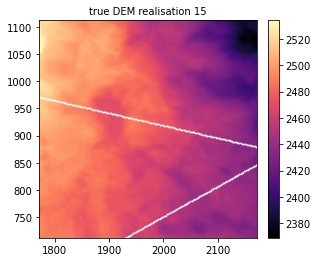

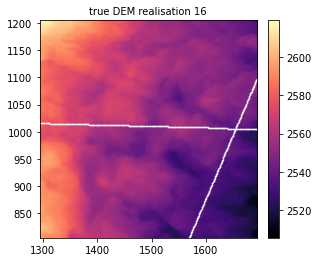

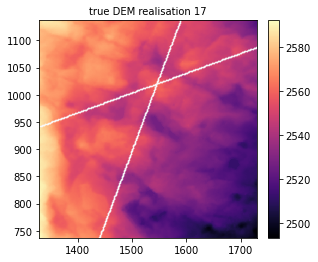

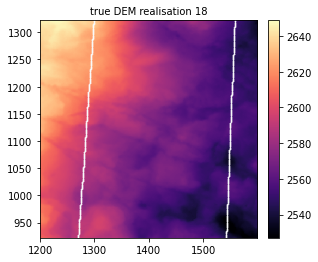

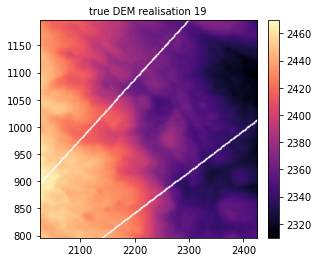

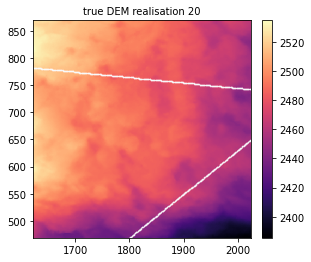

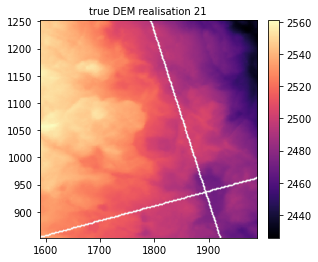

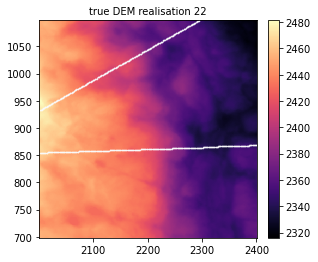

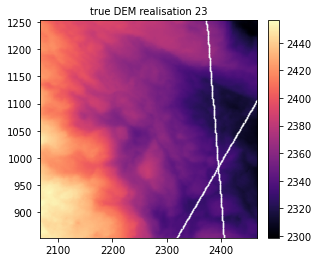

In [11]:
df_realisations.apply(lambda row: plot_true_and_simulation(row), axis=1)